<a href="https://colab.research.google.com/github/KaranRawat1998/Data-Science-Portfolio/blob/master/Malariadetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/cell_images/Train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/cell_images/Test'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


80142336/80134624 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/Dataset/cell_images/Train/*')

In [8]:
folders

['/content/drive/MyDrive/Colab Notebooks/Dataset/cell_images/Train/Uninfected',
 '/content/drive/MyDrive/Colab Notebooks/Dataset/cell_images/Train/Parasitized']

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/cell_images/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6389 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/cell_images/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
200/200 [==============================] - 3997s 20s/step - loss: 0.7722 - accuracy: 0.6764 - val_loss: 0.3391 - val_accuracy: 0.8358
Epoch 2/5
200/200 [==============================] - 81s 404ms/step - loss: 0.3595 - accuracy: 0.8373 - val_loss: 0.2930 - val_accuracy: 0.8582
Epoch 3/5
200/200 [==============================] - 81s 404ms/step - loss: 0.3358 - accuracy: 0.8554 - val_loss: 0.3476 - val_accuracy: 0.8657
Epoch 4/5
200/200 [==============================] - 81s 404ms/step - loss: 0.3052 - accuracy: 0.8783 - val_loss: 0.2227 - val_accuracy: 0.9104
Epoch 5/5
200/200 [==============================] - 81s 403ms/step - loss: 0.3105 - accuracy: 0.8800 - val_loss: 0.8296 - val_accuracy: 0.6716


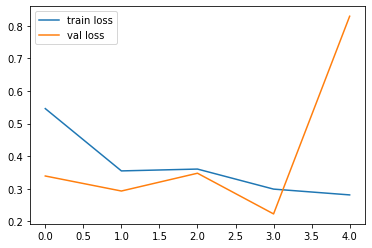

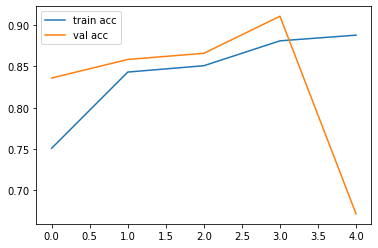

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model3_vgg19.h5')

In [19]:
y_pred = model.predict(test_set)

In [20]:
y_pred

array([[9.78669763e-01, 2.13302094e-02],
       [2.52521299e-02, 9.74747837e-01],
       [1.60619069e-03, 9.98393834e-01],
       [4.75713789e-01, 5.24286211e-01],
       [9.82225407e-04, 9.99017715e-01],
       [3.01364111e-03, 9.96986330e-01],
       [5.70749760e-01, 4.29250300e-01],
       [2.76981038e-03, 9.97230232e-01],
       [1.85385509e-03, 9.98146176e-01],
       [1.34560536e-03, 9.98654366e-01],
       [9.98272061e-01, 1.72796531e-03],
       [8.82847160e-02, 9.11715209e-01],
       [3.62828523e-01, 6.37171507e-01],
       [5.55329444e-03, 9.94446635e-01],
       [5.77031791e-01, 4.22968179e-01],
       [9.35179938e-04, 9.99064863e-01],
       [1.03605703e-01, 8.96394372e-01],
       [4.23431676e-03, 9.95765686e-01],
       [4.35276842e-03, 9.95647252e-01],
       [2.66495626e-03, 9.97335017e-01],
       [8.01508967e-03, 9.91984904e-01],
       [3.57013121e-02, 9.64298725e-01],
       [4.51666385e-01, 5.48333585e-01],
       [9.57968712e-01, 4.20312583e-02],
       [1.230659

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [34]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1])

In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [36]:
model=load_model('model3_vgg19.h5')

In [53]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/Dataset/cell_images/Test/Uninfected/C3thin_original_IMG_20150608_162922_cell_205.png',target_size=(224,224))


In [54]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [55]:
x.shape

(224, 224, 3)

In [56]:
x=x/255

In [57]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [58]:
model.predict(img_data)

array([[8.934208e-12, 1.000000e+00]], dtype=float32)

In [59]:
a=np.argmax(model.predict(img_data), axis=1)

In [60]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
